C:\Users\alberto.artasanchez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.0615028  0.02131043 0.02884259 0.01987914 0.03141178 0.01756465
 0.03598634 0.03131616 0.03185103 0.031612   0.03150998 0.04596541
 0.04796894 0.42187587 0.0298976  0.03094953 0.03568891 0.01559154
 0.01375306 0.01552222]


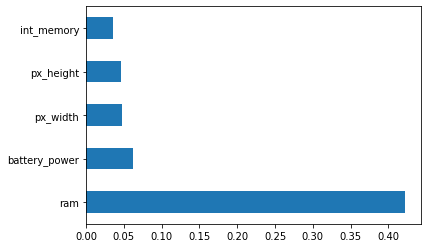

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("train.csv")
X = data.iloc[:,0:20] #independent columns
y = data.iloc[:,-1] # pick last column for the target feature
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class
# feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.
columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [8]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("train.csv")
X = data.iloc[:,0:20] #independent columns
y = data.iloc[:,-1] #pick last column for the target feature
#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
scores = pd.concat([dfcolumns,dfscores],axis=1)
scores.columns = ['specs','score']
print(scores.nlargest(5,'score')) #print the 5 best features

            specs          score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863


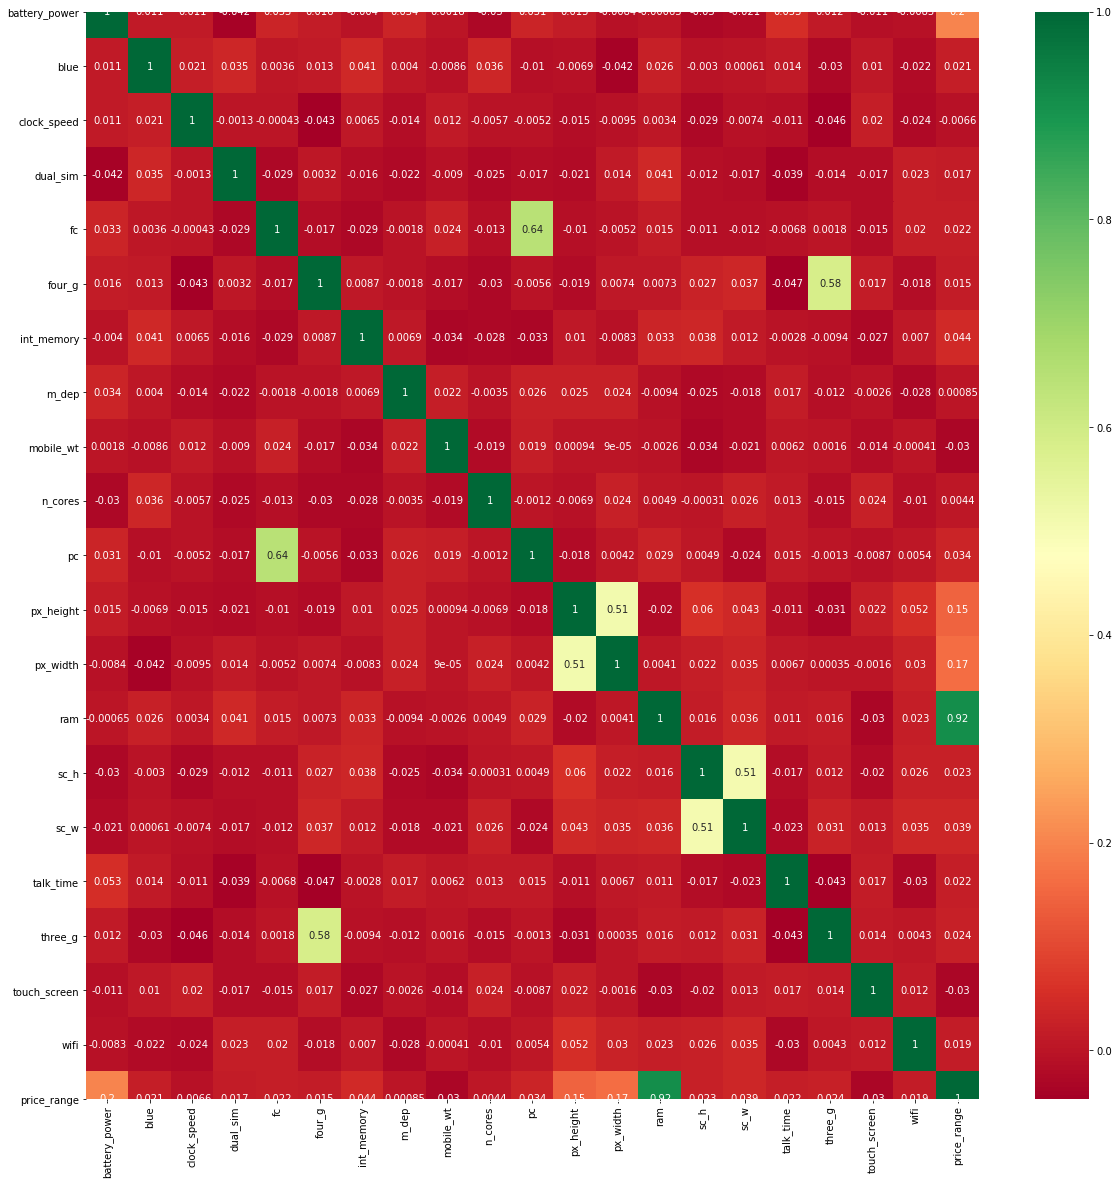

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("train.csv")
X = data.iloc[:,0:20] #independent columns
y = data.iloc[:,-1] # pick last column for the target feature
#get the correlations of each feature in the dataset
correlation_matrix = data.corr()
top_corr_features = correlation_matrix.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

In [10]:
threshold = 0.6
#Drop columns with a missing value rate higher than threshold
data = data[data.columns[data.isnull().mean() < threshold]]
#Drop rows with missing value rate higher than threshold
data = data.loc[data.isnull().mean(axis=1) < threshold]
threshold = 0.6
#Drop columns with a missing value rate higher than threshold
data = data[data.columns[data.isnull().mean() < threshold]]
#Drop rows with missing value rate higher than threshold
data = data.loc[data.isnull().mean(axis=1) < threshold]
print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

In [11]:
#Filling all missing values with 0
data = data.fillna(0)
#Filling missing values with medians of the columns
data = data.fillna(data.median())
print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

In [13]:
#Max fill function for categorical columns
import pandas as pd
data = pd.read_csv("dataset.csv")
data['color'].fillna(data['color'].value_counts().idxmax(),
inplace=True)
print(data)

    index   color
0       0   green
1       1  yellow
2       2     red
3       3     red
4       4  purple
5       5     red
6       6     red
7       7  purple
8       8     red
9       9     red
10     10  yellow
11     11     red
12     12   black
13     13   white


In [16]:
#Dropping the outlier rows with standard deviation
import pandas as pd
data = pd.read_csv("train.csv")
#Dropping the outlier rows with standard deviation
factor = 2
upper_lim = data['battery_power'].mean () + data['battery_power'].std() * factor
lower_lim = data['battery_power'].mean () - data['battery_power'].std() * factor
data = data[(data['battery_power'] < upper_lim) & (data['battery_power'] > lower_lim)]
print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

In [18]:
#Dropping the outlier rows with Percentiles
upper_lim = data['battery_power'].quantile(.99)
lower_lim = data['battery_power'].quantile(.01)
data = data[(data['battery_power'] < upper_lim) & (data['battery_power'] > lower_lim)]
print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1994            858     0          2.2         0   1       0          50   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

In [20]:
#Capping the outlier rows with percentiles
upper_lim = data['battery_power'].quantile(.99)
lower_lim = data['battery_power'].quantile(.01)
data.loc[(data['battery_power'] > upper_lim), 'battery_power'] = upper_lim
data.loc[(data['battery_power'] < lower_lim), 'battery_power'] = lower_lim
print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             842.0     0          2.2         0   1       0           7   
1            1021.0     1          0.5         1   0       1          53   
2             563.0     1          0.5         1   2       1          41   
3             615.0     1          2.5         0   0       0          10   
4            1821.0     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1994          858.0     0          2.2         0   1       0          50   
1995          794.0     1          0.5         1   0       1           2   
1996         1965.0     1          2.6         1   0       0          39   
1997         1911.0     0          0.9         1   1       1          36   
1998         1512.0     0          0.9         0   4       1          46   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

In [21]:
import pandas as pd
data = pd.read_csv("dataset.csv")
encoded_columns = pd.get_dummies(data['color'])
data = data.join(encoded_columns).drop('color', axis=1)
print(data)

    index  black  green  purple  red  white  yellow
0       0      0      1       0    0      0       0
1       1      0      0       0    0      0       1
2       2      0      0       0    0      0       0
3       3      0      0       0    1      0       0
4       4      0      0       1    0      0       0
5       5      0      0       0    1      0       0
6       6      0      0       0    1      0       0
7       7      0      0       1    0      0       0
8       8      0      0       0    0      0       0
9       9      0      0       0    1      0       0
10     10      0      0       0    0      0       1
11     11      0      0       0    0      0       0
12     12      1      0       0    0      0       0
13     13      0      0       0    0      1       0


In [22]:
#Log Transform Example
data = pd.DataFrame({'value':[3,67, -17, 44, 37, 3, 31, -38]})
data['log+1'] = (data['value']+1).transform(np.log)
#Negative Values Handling
#Note that the values are different
data['log'] = (data['value']-data['value'].min()+1) .transform(np.log)
print(data)

   value     log+1       log
0      3  1.386294  3.737670
1     67  4.219508  4.663439
2    -17       NaN  3.091042
3     44  3.806662  4.418841
4     37  3.637586  4.330733
5      3  1.386294  3.737670
6     31  3.465736  4.248495
7    -38       NaN  0.000000


In [24]:
data = pd.DataFrame({'value':[7,25, -47, 73, 8, 22, 53, -25]})
data['normalized'] = (data['value'] - data['value'].min()) / (data['value'].max() - data['value'].min())
print(data)

   value  normalized
0      7    0.450000
1     25    0.600000
2    -47    0.000000
3     73    1.000000
4      8    0.458333
5     22    0.575000
6     53    0.833333
7    -25    0.183333


In [26]:
data = pd.DataFrame({'value':[7,25, -47, 73, 8, 22, 53, -25]})
data['standardized'] = (data['value'] - data['value'].mean()) / data['value'].std()
print(data)

   value  standardized
0      7     -0.193539
1     25      0.270954
2    -47     -1.587017
3     73      1.509601
4      8     -0.167733
5     22      0.193539
6     53      0.993498
7    -25     -1.019303
